# Problem Research

Memprediksi apakah seorang klien akan mengalami keterlambatan pembayaran pada pinjaman mereka atau tidak. Secara lebih spesifik, tujuan dari analisis ini adalah:



1.   **Peningkatan Efisiensi**,
Memungkinkan lembaga keuangan untuk mengalokasikan sumber daya dengan lebih efisien dengan fokus pada aplikasi pinjaman yang berpotensi menghasilkan keuntungan atau memiliki risiko yang dapat dikelola.
2.   **Prediksi Risiko Kredit**,
Memprediksi kemungkinan terjadinya keterlambatan pembayaran (late payment) pada pinjaman tersebut. Menentukan risiko kredit dari setiap aplikasi pinjaman yang diajukan.
3.  **Pengambilan Keputusan Peminjaman**, Membantu dalam menentukan syarat dan ketentuan pinjaman, termasuk jumlah kredit, tingkat bunga, dan jangka waktu pembayaran.



# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Application Data

In [ ]:
train = '/content/drive/My Drive/HCI/application_train.csv'

train = pd.read_csv(train)

train.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = '/content/drive/My Drive/HCI/application_test.csv'

test = pd.read_csv(test)

test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
test.shape

(48744, 121)

In [ ]:
train.shape

(307511, 122)

# Pre-Processing

## Application Data

In [ ]:
for column in train.columns:
    print(column, train[column].isnull().sum())

In [ ]:
train_new = train.drop(columns=['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                                'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                                'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG',
                                'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG'])

In [ ]:
test_new = test.drop(columns=['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                                'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                                'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG',
                                'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG'])

In [ ]:
train_new.duplicated().sum()

0

In [ ]:
train_new.shape

(307511, 102)

In [ ]:
test_new.shape

(48744, 101)

In [ ]:
train_drop = train_new.dropna()

In [ ]:
test_drop = test_new.dropna()

In [ ]:
train_drop.shape

(55251, 102)

In [ ]:
test_drop.shape

(8864, 101)

In [ ]:
for column in train.columns:
    print(train_drop.dtypes)

In [ ]:
train_drop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0,0,0,0,0,0,0
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,...,0,0,0,0,0,0,0,0,0,0
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,...,0,0,0,0,0,0,0,0,0,0


# VISUALISASI

## Application

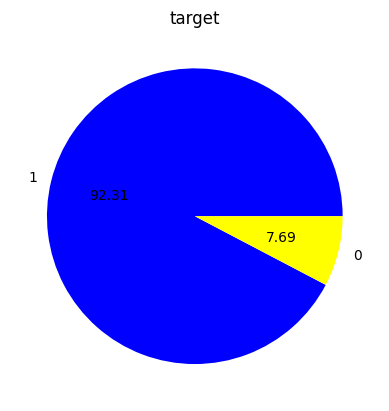

In [ ]:
plt.pie(train_drop.groupby(by=["TARGET"]).size(), labels = train_drop["TARGET"].unique(),autopct = "%0.2f", colors=['blue', 'yellow'])
plt.title('target')
plt.show()

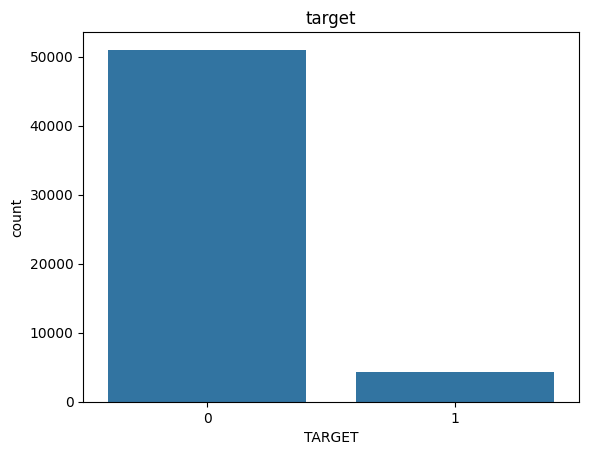

In [ ]:
sns.countplot(x=train_drop['TARGET'], order=train_drop['TARGET'].value_counts().index)
plt.title('target');

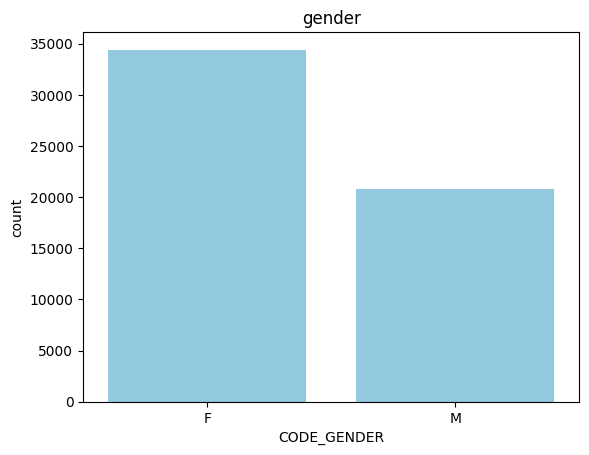

In [ ]:
sns.countplot(x=train_drop['CODE_GENDER'], order=train_drop['CODE_GENDER'].value_counts().index, color='skyblue')
plt.title('gender');

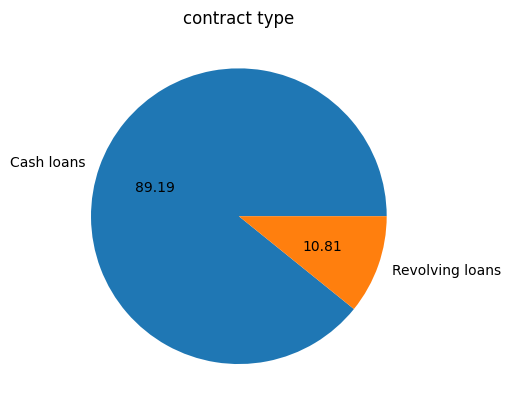

In [ ]:
plt.pie(train_drop.groupby(by=["NAME_CONTRACT_TYPE"]).size(), labels = train_drop["NAME_CONTRACT_TYPE"].unique(),autopct = "%0.2f")
plt.title('contract type')
plt.show()

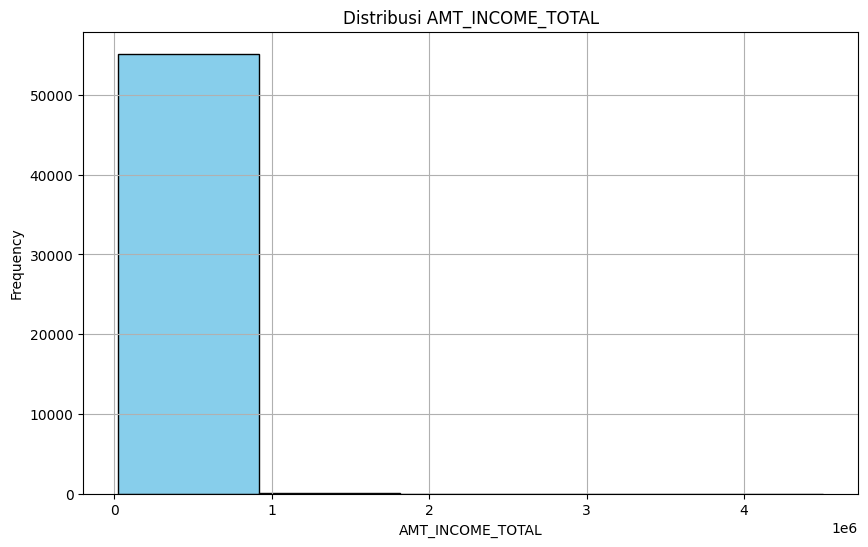

In [ ]:
data = train_drop['AMT_INCOME_TOTAL']

plt.figure(figsize=(10, 6))
plt.hist(data, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribusi AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

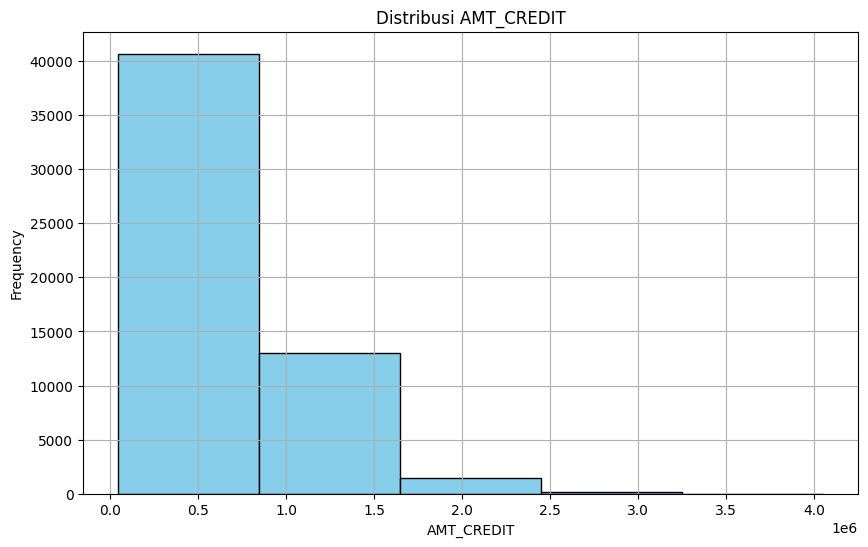

In [ ]:
data = train_drop['AMT_CREDIT']

plt.figure(figsize=(10, 6))
plt.hist(data, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribusi AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

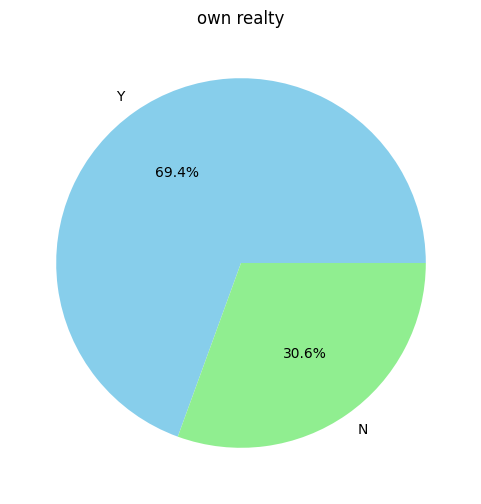

In [ ]:
own_realty = train_drop['FLAG_OWN_REALTY'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(own_realty, labels=own_realty.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('own realty')
plt.show()

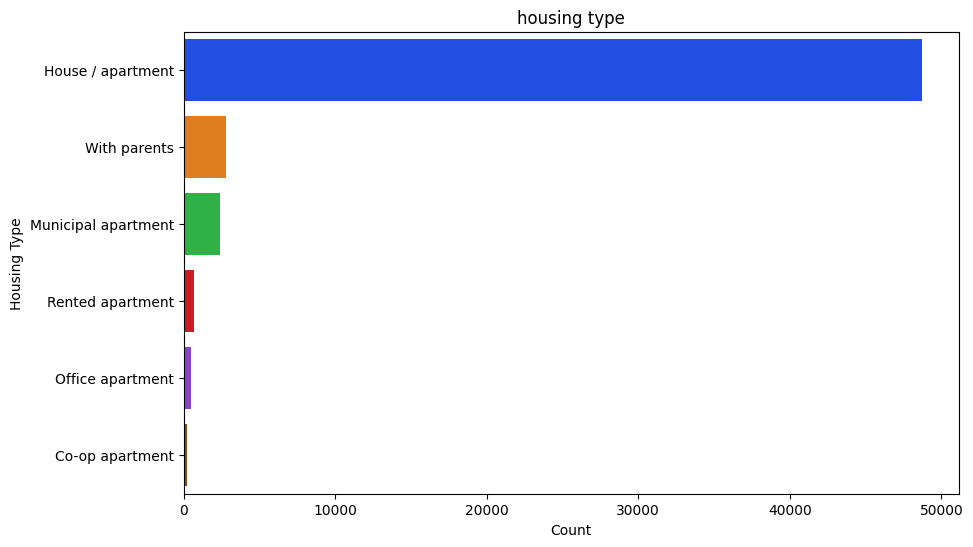

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=train_drop['NAME_HOUSING_TYPE'].value_counts(), y=train_drop['NAME_HOUSING_TYPE'].value_counts().index, hue=train_drop['NAME_HOUSING_TYPE'].value_counts().index, palette='bright', legend=False)
plt.title('housing type')
plt.xlabel('Count')
plt.ylabel('Housing Type')
plt.show()


<Figure size 1000x600 with 0 Axes>

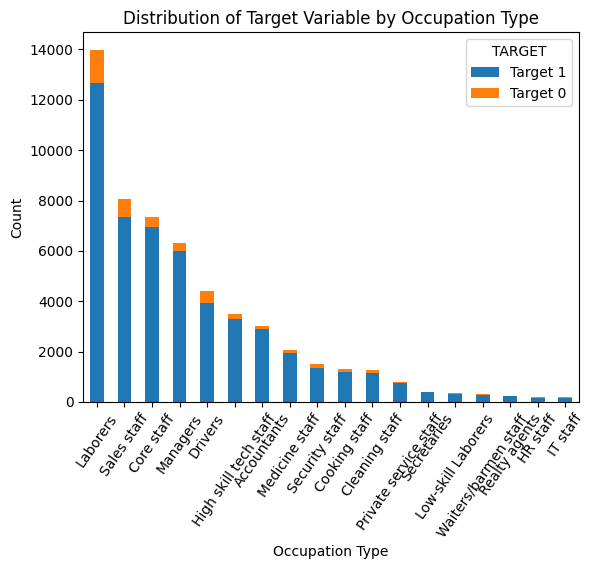

In [ ]:
occupation_counts = train_drop.groupby(['OCCUPATION_TYPE', 'TARGET']).size().unstack(fill_value=0)
occupation_counts['Total'] = occupation_counts.sum(axis=1)
occupation_counts = occupation_counts.sort_values(by='Total', ascending=False)

plt.figure(figsize=(10, 6))
occupation_counts.drop(columns='Total').plot(kind='bar', stacked=True)
plt.title('Distribution of Target Variable by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.legend(title='TARGET', labels=['Target 1', 'Target 0'])
plt.show()

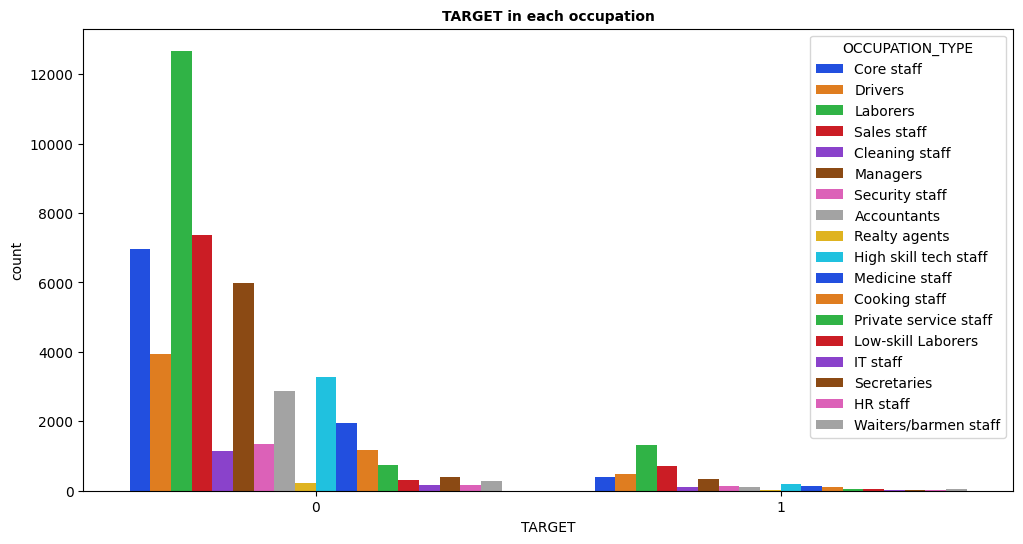

In [ ]:
plt.figure(figsize=(12, 6))

occupation_counts = train_drop['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)

sns.countplot(x='TARGET',hue="OCCUPATION_TYPE", data=train_drop, order=train_drop['TARGET'].value_counts().index, palette='bright')
plt.title("TARGET in each occupation",fontweight="bold", size=10)
plt.show()

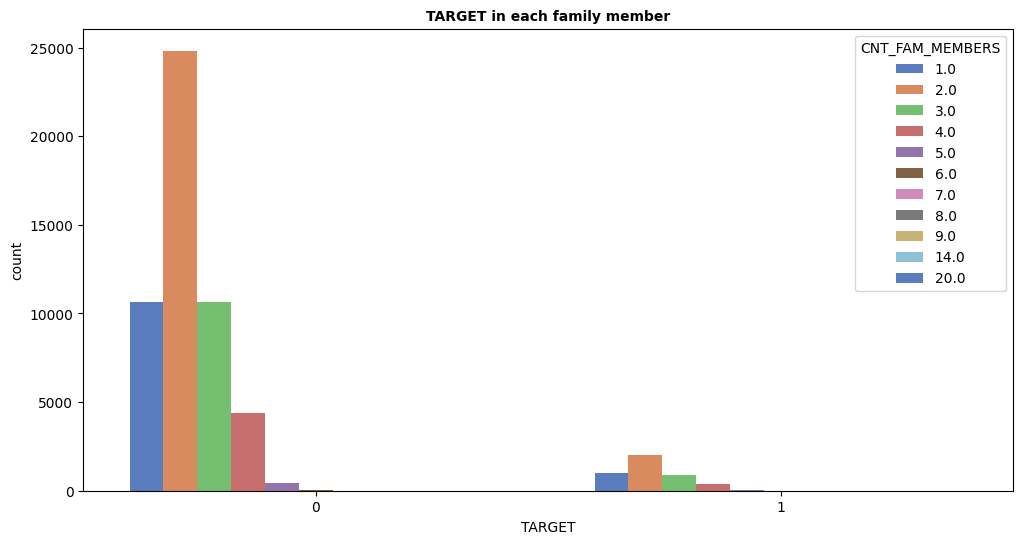

In [ ]:
plt.figure(figsize=(12, 6))

occupation_counts = train_drop['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending=False)

sns.countplot(x='TARGET',hue="CNT_FAM_MEMBERS", data=train_drop, order=train_drop['TARGET'].value_counts().index, palette='muted')
plt.title("TARGET in each family member",fontweight="bold", size=10)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=train_drop['NAME_INCOME_TYPE'].value_counts(), y=train_drop['NAME_INCOME_TYPE'].value_counts().index, hue=train_drop['NAME_INCOME_TYPE'].value_counts().index, palette='bright', legend=False)
plt.title('housing type')
plt.xlabel('Count')
plt.ylabel('Housing Type')
plt.show()


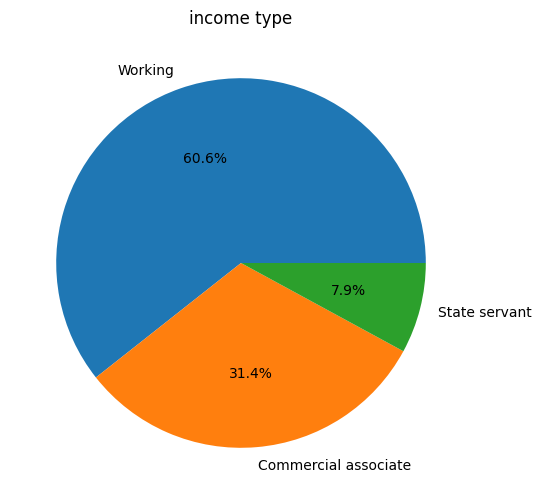

In [ ]:
income_type = train_drop[(train_drop['NAME_INCOME_TYPE'] != 'Businessman') & (train_drop['NAME_INCOME_TYPE'] != 'Student')]

income = income_type['NAME_INCOME_TYPE'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(income, labels=income.index, autopct='%1.1f%%')
plt.title('income type')
plt.show()

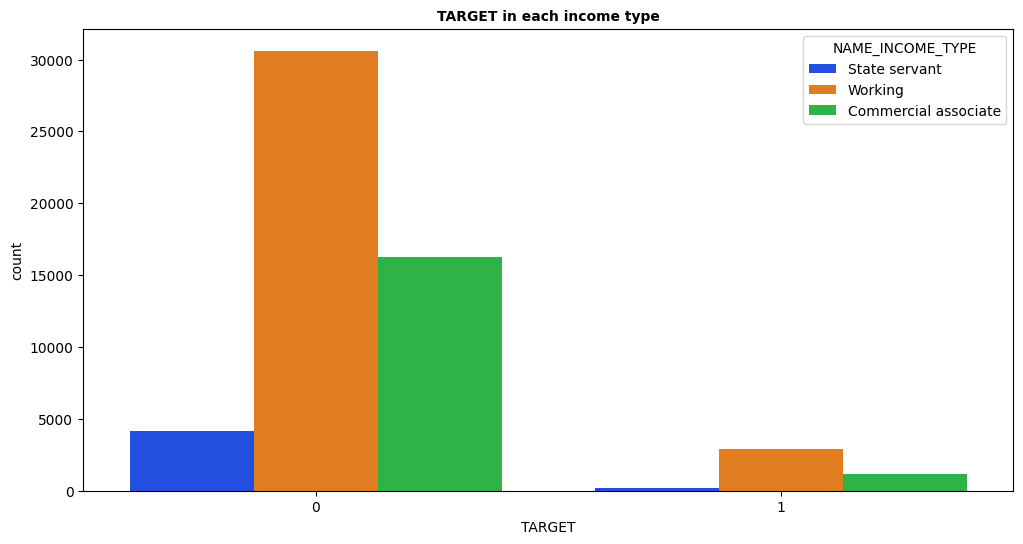

In [ ]:
plt.figure(figsize=(12, 6))

occupation_counts = income_type['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False)

sns.countplot(x='TARGET',hue="NAME_INCOME_TYPE", data=income_type, order=income_type['TARGET'].value_counts().index, palette='bright')
plt.title("TARGET in each income type",fontweight="bold", size=10)
plt.show()

## Laborers

In [ ]:
laborers = train_drop.loc[train_drop['OCCUPATION_TYPE'] == 'Laborers']
laborers.shape

(13984, 102)

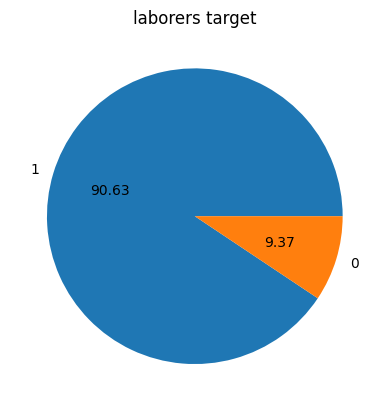

In [ ]:
plt.pie(laborers.groupby(by=["TARGET"]).size(), labels = laborers["TARGET"].unique(),autopct = "%0.2f")
plt.title('laborers target')
plt.show()

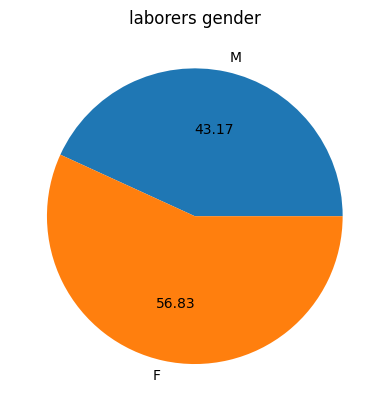

In [ ]:
plt.pie(laborers.groupby(by=["CODE_GENDER"]).size(), labels = laborers["CODE_GENDER"].unique(),autopct = "%0.2f")
plt.title('laborers gender')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

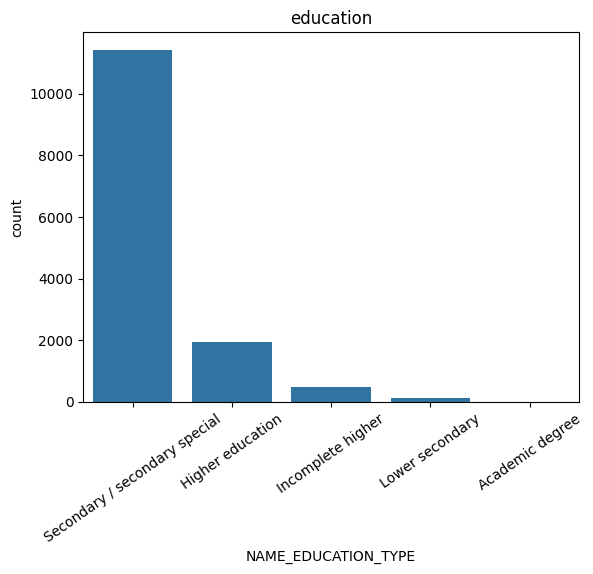

In [ ]:
sns.countplot(x=laborers['NAME_EDUCATION_TYPE'], order=laborers['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('education');
plt.xticks(rotation=35)

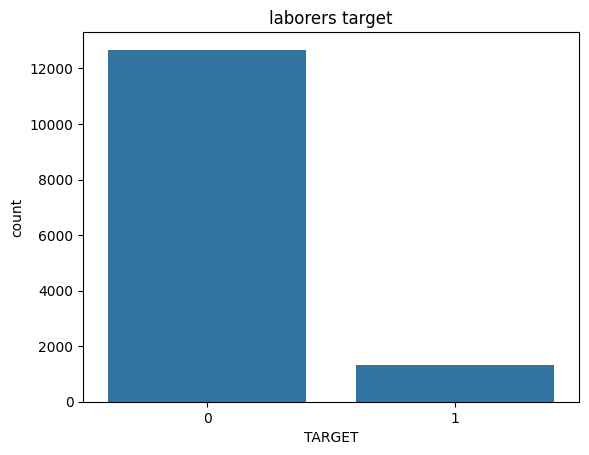

In [ ]:
sns.countplot(x=laborers['TARGET'], order=laborers['TARGET'].value_counts().index)
plt.title('laborers target');

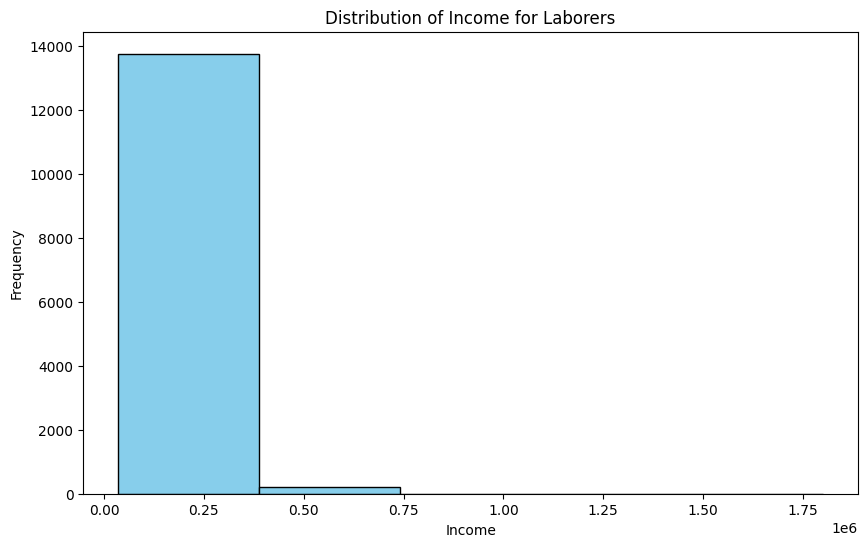

In [ ]:
laborers_income = train_drop[train_drop['OCCUPATION_TYPE'] == 'Laborers']['AMT_INCOME_TOTAL']

plt.figure(figsize=(10, 6))
plt.hist(laborers_income, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Income for Laborers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

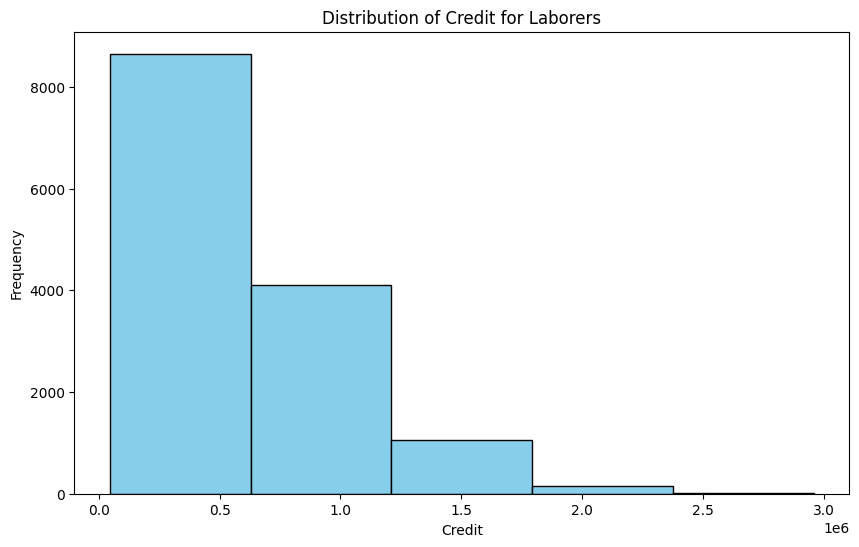

In [ ]:
laborers_credit = train_drop[train_drop['OCCUPATION_TYPE'] == 'Laborers']['AMT_CREDIT']

plt.figure(figsize=(10, 6))
plt.hist(laborers_credit, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit for Laborers')
plt.xlabel('Credit')
plt.ylabel('Frequency')
plt.show()

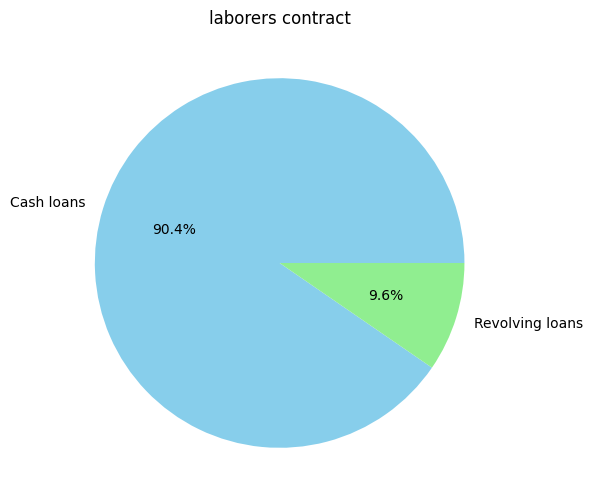

In [ ]:
contract = laborers['NAME_CONTRACT_TYPE'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(contract, labels=contract.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('laborers contract')
plt.show()

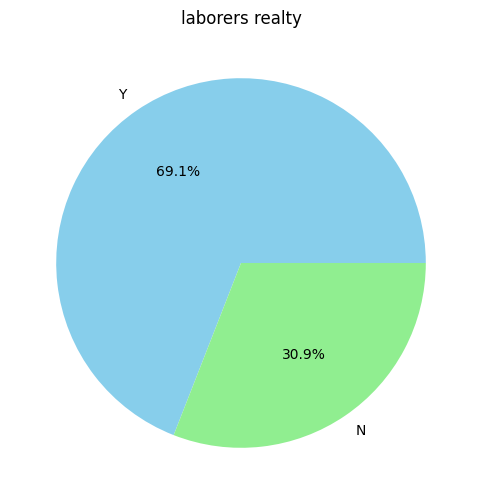

In [ ]:
realty = laborers['FLAG_OWN_REALTY'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(realty, labels=realty.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('laborers realty')
plt.show()

# Business Insight

Terdapat tantangan signifikan dalam mengelola risiko pembayaran terlambat, dengan sekitar 92% peminjam mengalami keterlambatan. Ini menunjukkan perlunya penilaian kredit yang lebih cermat dan strategi pengelolaan risiko yang lebih efektif, sementara fokus pada penawaran produk peminjaman tunai dapat memberikan keuntungan kompetitif. Dengan 69% peminjam memiliki rumah sendiri, ada peluang untuk mengembangkan produk pinjaman yang berfokus pada pemilik rumah, seperti pinjaman berbasis ekuitas rumah, sementara pekerja buruh, sales staff, dan driver merupakan segmen yang rentan terhadap keterlambatan pembayaran, yang memerlukan strategi khusus untuk mengelola risiko dari segmen-segmen ini.

Berdasarkan fakta tersebut, Untuk mengurangi tingkat keterlambatan pembayaran, diperlukan evaluasi lebih mendalam terhadap pengaturan kredit dan pengelolaan risiko, sementara pengembangan produk baru yang sesuai dengan permintaan pasar, seperti produk pinjaman berbasis rumah tangga, dapat menjadi langkah strategis. Proses penilaian risiko kredit perlu diperkuat, terutama untuk segmen-segmen yang rentan seperti pekerja buruh dan driver.



---



Berdasarkan visualisasi data, dapat dilihat bahwa buruh merupakan kelompok pekerjaan yang paling banyak melakukan peminjaman, dengan jumlah pinjaman mencapai lebih dari 55.000 pinjaman. Sebanyak 90%, buruh menunjukkan adanya keterlambatan pembayaran dalam sejarah pinjaman. tipe kontrak yang dominan di antara buruh adalah pinjaman tunai sebanyak 91%, ketimbang pinjaman bergulir.

Berdasarkan fakta tersebut, Perusahaan perlu melakukan analisis risiko lebih lanjut terhadap kelompok buruh yang memiliki proporsi tinggi untuk mengidentifikasi faktor-faktor yang menyebabkan keterlambatan pembayaran dan mengurangi risiko kerugian. Selain itu, dengan dominannya pinjaman tunai di antara buruh, perusahaan dapat mengembangkan produk-produk pinjaman yang lebih sesuai dengan preferensi mereka, seperti penawaran bunga yang kompetitif dan jangka waktu yang fleksibel.

# Machine Learning Implementation

## Logistic Regression

### Modelling

In [ ]:
label_encoder = LabelEncoder()

for column in train_drop.columns:
    if train_drop[column].dtype == 'object':
        train_drop.loc[:, column] = label_encoder.fit_transform(train_drop.loc[:, column])

In [ ]:
label_encoder = LabelEncoder()

for column in test_drop.columns:
    if test_drop[column].dtype == 'object':
        test_drop.loc[:, column] = label_encoder.fit_transform(test_drop.loc[:, column])

In [ ]:
train_drop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
13,100017,0,0,1,1,0,1,225000.0,918468.0,28966.5,...,0,0,0,0,0,0,0,0,0,0
14,100018,0,0,0,0,1,0,189000.0,773680.5,32778.0,...,0,0,0,0,0,0,0,0,0,0
18,100022,0,1,0,0,1,0,112500.0,157500.0,7875.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_drop.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = train_drop['TARGET'].ravel()

In [ ]:
print ('X:', X.shape,'\ny:', y.shape)

X: (55251, 100) 
y: (55251,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
reg = linear_model.LogisticRegression(max_iter=1000)

In [ ]:
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_reg = reg.predict(X_test)

In [ ]:
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(y_test, y_pred_reg)*100)

Logistic Regression model accuracy(in %): 92.31743733598769


### Evaluation

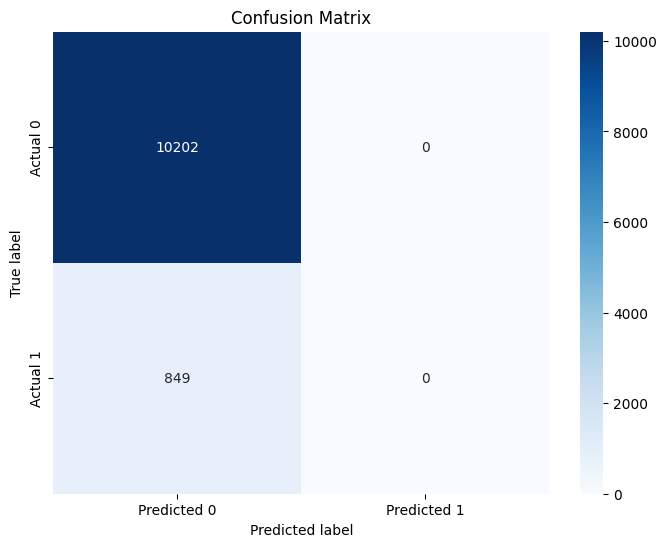

In [ ]:
cm = confusion_matrix(y_test, y_pred_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_reg, zero_division=1)

print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10202
           1       1.00      0.00      0.00       849

    accuracy                           0.92     11051
   macro avg       0.96      0.50      0.48     11051
weighted avg       0.93      0.92      0.89     11051



### Predict test data

In [ ]:
testing = test_drop.drop('SK_ID_CURR', axis=1)
testing

In [ ]:
cols = testing.columns

scalertest = StandardScaler()
scaledtest = scalertest.fit_transform(testing)

In [ ]:
scaled = pd.DataFrame(scaledtest, columns=[cols])

In [ ]:
predictions = reg.predict(scaled)

In [ ]:
df_test_new = pd.DataFrame(testing)

In [ ]:
df_test_new['TARGET'] = predictions

In [ ]:
df_test_new

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,...,0,0,0,0,0,0,0,0,0,0
15,0,1,1,1,0,180000.0,296280.0,21690.0,225000.0,6,...,0,0,0,0,0,0,0,0,0,0
18,0,0,1,1,1,225000.0,431280.0,23526.0,360000.0,6,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,1,0,99000.0,225000.0,19242.0,225000.0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48710,0,1,1,0,0,225000.0,275373.0,32679.0,225000.0,6,...,0,0,0,0,0,0,0,0,0,0
48713,0,1,0,1,0,112500.0,156384.0,16551.0,135000.0,6,...,0,0,0,0,0,0,0,0,0,0
48719,0,0,0,1,1,112500.0,690313.5,35374.5,549000.0,6,...,0,0,0,0,0,0,0,0,0,0
48724,0,0,0,1,1,112500.0,514710.0,17707.5,387000.0,6,...,0,0,0,0,0,0,0,0,0,0


## Random Forest Classifier

### Modelling

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = RF_model.predict(X_test)

In [ ]:
print("Random Forest model accuracy(in %):",
      accuracy_score(y_test , y_pred_RF)*100)

Random Forest model accuracy(in %): 92.32648629083342


### Evaluation

In [ ]:
num_folds = 5

RF_model = RandomForestClassifier()

cv_scores = cross_val_score(RF_model, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.92319005 0.92319005 0.92319005 0.92319005 0.92307692]
Mean accuracy: 0.9231674208144798


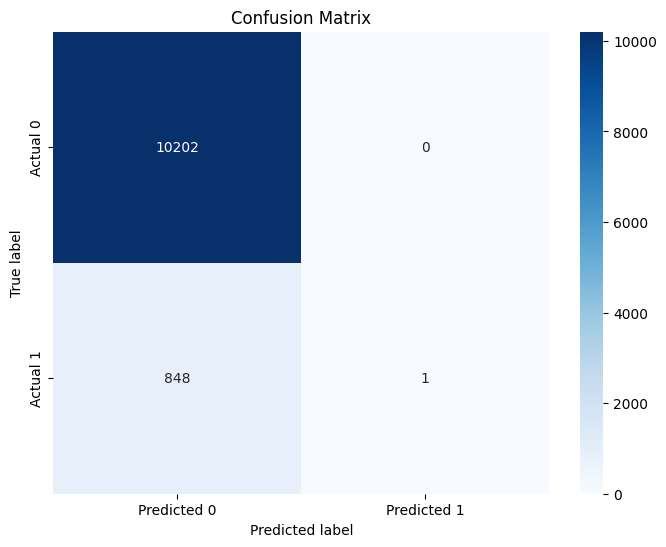

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report_rf = classification_report(y_test, y_pred_reg, zero_division=1)

print(report_rf)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10202
           1       1.00      0.00      0.00       849

    accuracy                           0.92     11051
   macro avg       0.96      0.50      0.48     11051
weighted avg       0.93      0.92      0.89     11051



# Business Recomendation

**Penyempurnaan Proses Bisnis:**


Evaluasi model yang menghasilkan akurasi yang tinggi seperti Logistic Regression dan Random Forest dapat membantu evaluasi dan menyempurnakan proses bisnis yang ada. Hasil analisis dapat digunakan untuk mengidentifikasi area-area di mana Anda dapat meningkatkan efisiensi operasional dan mengurangi biaya.

**Optimalkan Proses Penilaian Kredit:**


Dengan akurasi yang tinggi dari model klasifikasi, model tersebut dapat digunakan sebagai bagian dari proses penilaian kredit yang lebih efisien. Ini dapat membantu identifikasi dengan lebih tepat calon peminjam yang berisiko tinggi, sehingga dapat mengurangi risiko kredit macet dan meningkatkan profitabilitas perusahaan.

**Pengembangan Produk yang Lebih Tepat Sasaran:**


Dengan memanfaatkan hasil prediksi dari model, dapat dilakukan identifikasi kebutuhan pasar yang belum terpenuhi dan mengembangkan produk atau layanan baru yang lebih sesuai dengan preferensi dan kebutuhan pelanggan. Hal ini dapat membantu meningkatkan daya saing perusahaan dan menghasilkan pendapatan tambahan.